In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

print(f"Tensorflow Version : {tf.__version__}")
print(f"Tensorflow Datasets Version : {tfds.__version__}")

Tensorflow Version : 2.9.2
Tensorflow Datasets Version : 4.6.0


### Get Data

In [2]:
(train_images, test_images), info = tfds.load(name='rock_paper_scissors', 
                                split=['train','test'], 
                                as_supervised=True, 
                                with_info=True)

### Data Introduction

In [3]:
print(f"image shape : {info.features['image'].shape}")
print(f"image class : {info.features['label'].num_classes}")
print(f"train image is : {info.splits['train'].num_examples}, test images is : {info.splits['test'].num_examples}", sep='\n')

image shape : (300, 300, 3)
image class : 3
train image is : 2520, test images is : 372


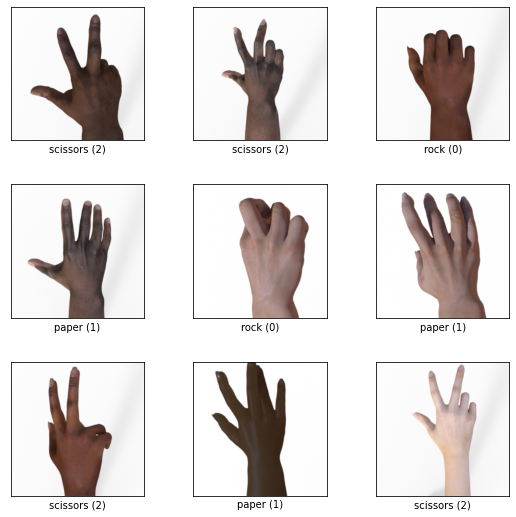

In [4]:
fig = tfds.show_examples(train_images, info)

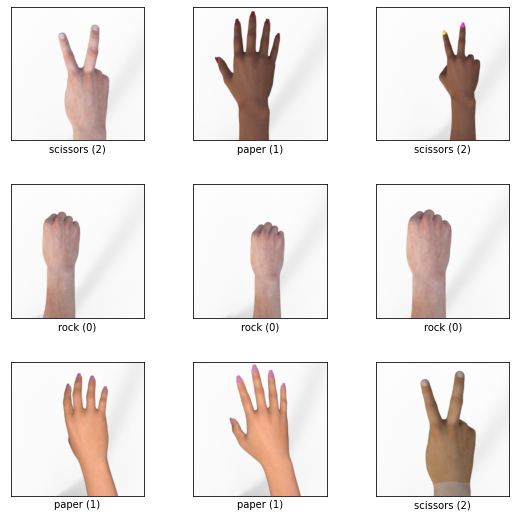

In [5]:
fig = tfds.show_examples(test_images, info)

### Model

In [ ]:
class myCallback(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.95:
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
IMG_SIZE = 100

re_in = layers.Resizing(IMG_SIZE, IMG_SIZE)
re_out = layers.Rescaling(1./255)(re_in)

resize_and_rescale = Model(inputs=re_in, outputs=re_out, name='data_augmentation')

In [ ]:
first = layers.Input(shape=(100, 100, 3))
x = layers.Conv2D(32, (3, 3), activation=tf.nn.relu)(first)
x = layers.MaxPool2D(2, 2)(x)
x = layers.Conv2D(64, (3, 3), activation=tf.nn.relu)(x)
x = layers.MaxPool2D(2, 2)(x)
x = layers.Dropout(0.25)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation=tf.nn.relu)(x)
last = layers.Dense(3, activation=tf.nn.softmax)

model = Model(inputs=first, outputs=last, name='convolutional_neural_network')